#  Lung Cancer Prediction

## Data Loading & Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("survey_lung_cancer.csv")

In [3]:
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Checking Missing Values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [6]:
print(df.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [7]:
print(df.nunique()) # Checking unique values in each column

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


In [8]:
#Converting Categorical Variables
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [50]:
#Normalizing the numerical features
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
df[["AGE"]] = scaler.fit_transform(df[["AGE"]])

In [12]:
print(df)

     GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1  0.808834        0               1        1              0   
1         1  1.461392        1               0        0              0   
2         0 -0.496282        0               0        0              1   
3         1  0.025764        1               1        1              0   
4         0  0.025764        0               1        0              0   
..      ...       ...      ...             ...      ...            ...   
304       0 -0.887817        0               0        0              1   
305       1  0.939346        1               0        0              0   
306       1 -0.626794        1               0        0              0   
307       1  0.547811        1               0        1              0   
308       1 -0.104747        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1        

In [13]:
#Split Data Train and Test
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns = ["LUNG_CANCER"])
y = df["LUNG_CANCER"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Performing EDA (Exploratory Data Analysis)

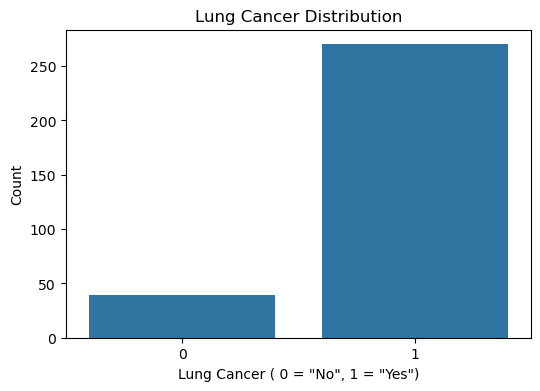

In [16]:
# Checking class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Lung Cancer Distribution")
plt.xlabel('Lung Cancer ( 0 = "No", 1 = "Yes")')
plt.ylabel('Count')
plt.show()

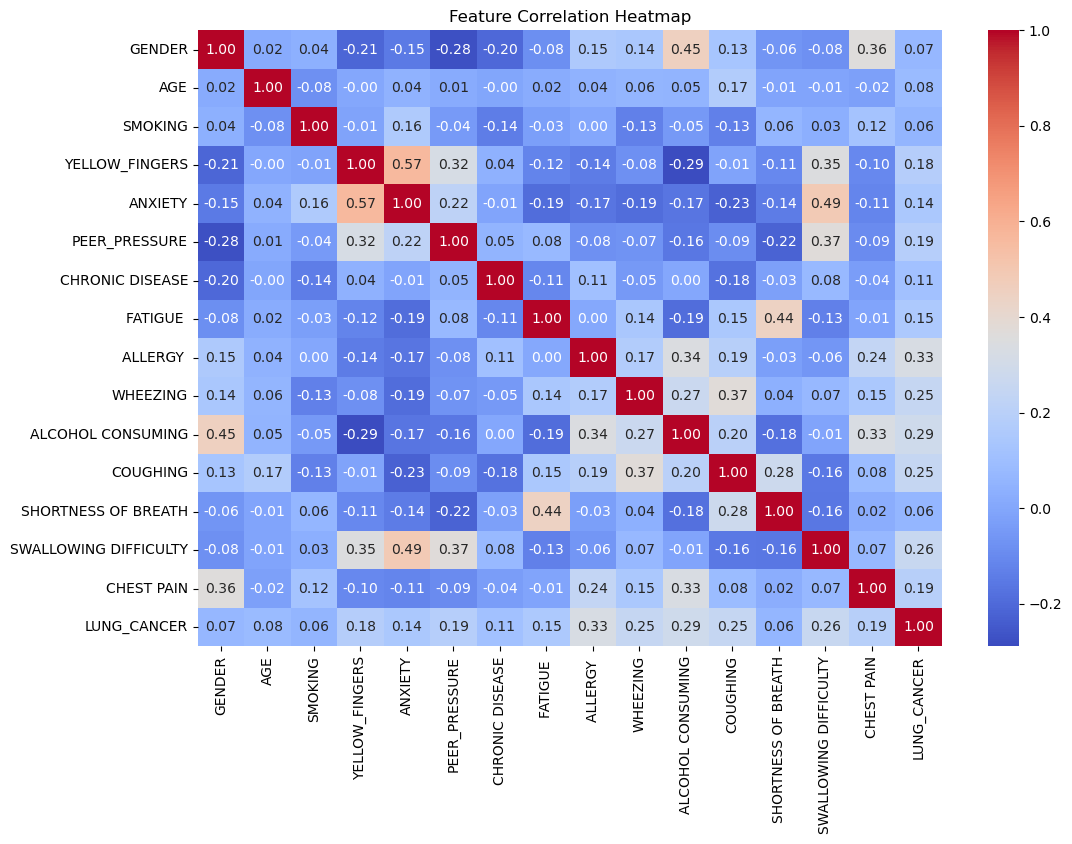

In [17]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm", fmt = ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

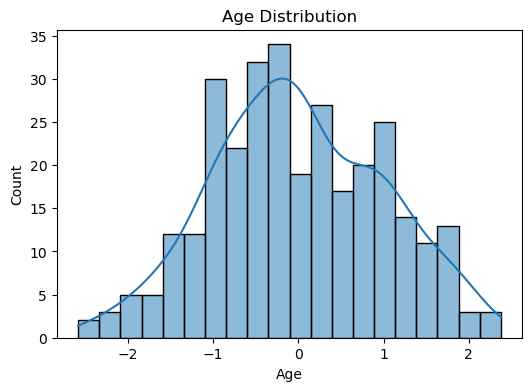

In [18]:
# Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df['AGE'], bins=20, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 1000x500 with 0 Axes>

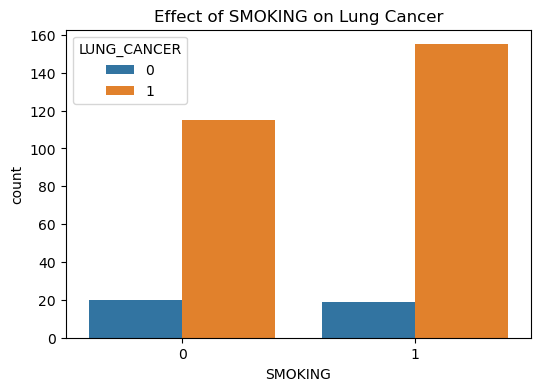

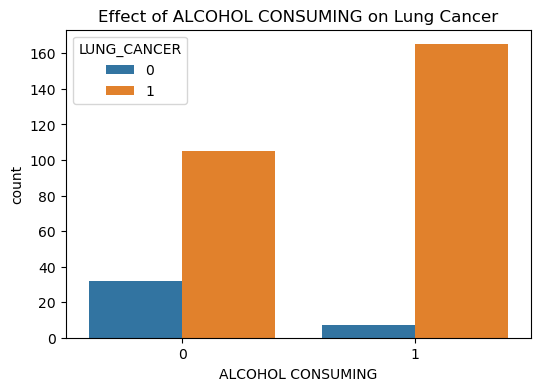

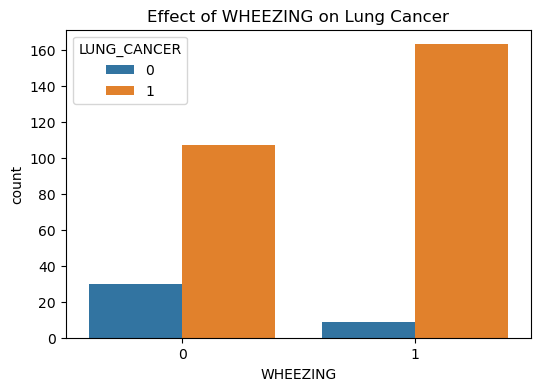

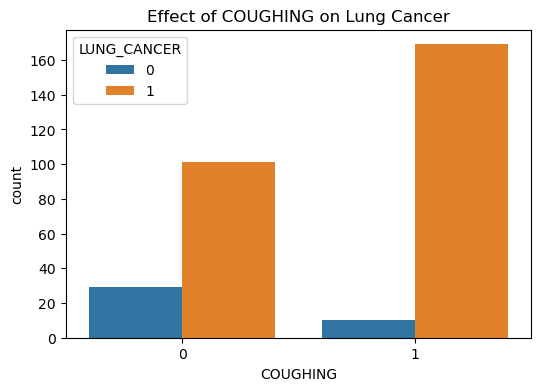

In [19]:
# Feature Impact on Lung Cancer

plt.figure(figsize=(10,5))
for i in ['SMOKING','ALCOHOL CONSUMING', 'WHEEZING', 'COUGHING']:
    plt.figure(figsize=(6,4))
    sns.countplot(x = i, hue = "LUNG_CANCER", data = df)
    plt.title(f"Effect of {i} on Lung Cancer")
    plt.show()

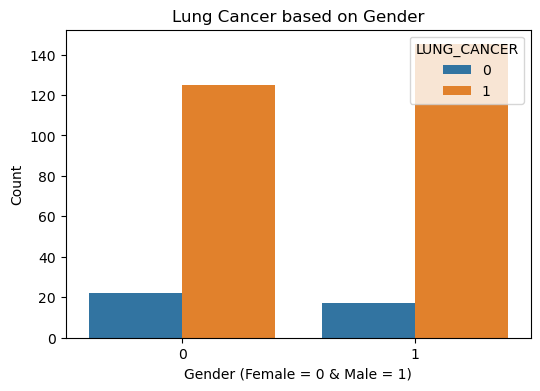

In [20]:
# Checking Gender vs Lung_Cancer
plt.figure(figsize=(6,4))
sns.countplot(x = 'GENDER', hue = 'LUNG_CANCER', data = df)
plt.title("Lung Cancer based on Gender")
plt.xlabel("Gender (Female = 0 & Male = 1)")
plt.ylabel("Count")
plt.show()

In [42]:
# Balance the Dataset Using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
from collections import Counter
print("Class distribution before balancing:", Counter(y_train))
print("Class distribution after balancing:", Counter(y_train_bal))

Class distribution before balancing: Counter({1: 210, 0: 37})
Class distribution after balancing: Counter({1: 210, 0: 210})


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Logistic Regression accuracy: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Logistic Regression accuracy:  0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy:  0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =100, random_state = 42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.967741935483871
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



# XG Boost

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.9838709677419355
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



# Hyperparameter Tuning

In [33]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [40]:
# Bayesian Optimization
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
    }
    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:", study.best_trial.params)

[I 2025-03-11 12:52:32,068] A new study created in memory with name: no-name-9556f086-a2f3-4d6a-aa68-7da34508b148
[I 2025-03-11 12:52:32,454] Trial 0 finished with value: 0.8545306122448979 and parameters: {'learning_rate': 0.20639218039376891, 'n_estimators': 114, 'max_depth': 7}. Best is trial 0 with value: 0.8545306122448979.
[I 2025-03-11 12:52:33,266] Trial 1 finished with value: 0.8746938775510203 and parameters: {'learning_rate': 0.04190826968689192, 'n_estimators': 232, 'max_depth': 5}. Best is trial 1 with value: 0.8746938775510203.
[I 2025-03-11 12:52:33,779] Trial 2 finished with value: 0.8828571428571428 and parameters: {'learning_rate': 0.08695419904725443, 'n_estimators': 184, 'max_depth': 3}. Best is trial 2 with value: 0.8828571428571428.
[I 2025-03-11 12:52:34,701] Trial 3 finished with value: 0.8586122448979591 and parameters: {'learning_rate': 0.06108186106341466, 'n_estimators': 393, 'max_depth': 6}. Best is trial 2 with value: 0.8828571428571428.
[I 2025-03-11 12:5

Best Hyperparameters: {'learning_rate': 0.023154990998004416, 'n_estimators': 250, 'max_depth': 6}


# Model Comparision

In [32]:
models = {
    "Logistic Regression": accuracy_score(y_test,y_pred),
    "Decision Tree": accuracy_score(y_test,y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XG Boost": accuracy_score(y_test, y_pred_xgb)
}

for model,acc in models.items():
    print(f"{model}: {acc:.4f}")

Logistic Regression: 0.9677
Decision Tree: 0.9677
Random Forest: 0.9677
XG Boost: 0.9839


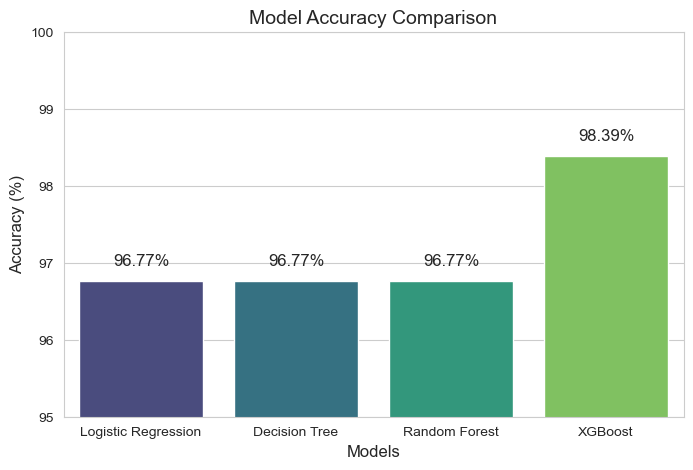

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [96.77, 96.77, 96.77, 98.39]
})

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Model", y="Accuracy", hue="Model", palette="viridis", legend=False)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)

for i, score in enumerate(data["Accuracy"]):
    plt.text(i, score + 0.2, f"{score:.2f}%", ha="center", fontsize=12)

plt.ylim(95, 100) 
plt.show()


# Final Reports

In [55]:
from IPython.display import display, Markdown

model_comparison_report = """
# Model Comparison Report: Lung Cancer Prediction

## 1. Introduction
Lung cancer is a life-threatening disease that requires early detection for effective treatment. Machine learning models were developed and evaluated on a dataset to predict lung cancer based on various risk factors such as smoking, wheezing, coughing, alcohol consumption, and more. This report presents the performance of different models and their accuracy.

---

## 2. Models Evaluated & Performance
We trained four machine learning models on the dataset and evaluated their performance based on accuracy.

| **Model**               | **Accuracy** |
|-------------------------|--------------|
| Logistic Regression     | 96.77%       |
| Decision Tree          | 96.77%       |
| Random Forest         | 96.77%       |
| XGBoost               | **98.39%**    |

### 2.1 Observations
- **Logistic Regression**: Provided a strong baseline performance (96.77%), suitable for simple linear relationships.
- **Decision Tree**: Performed similarly but is prone to overfitting on small datasets.
- **Random Forest**: Slightly improved decision-making by aggregating multiple trees but did not outperform the baseline.
- **XGBoost**: Achieved the highest accuracy (98.39%) due to its ability to handle complex patterns.

---

## 3. Conclusion
Based on the accuracy scores, **XGBoost** is the best performing model for lung cancer prediction.

**End of Report**
"""

display(Markdown(model_comparison_report))



# Model Comparison Report: Lung Cancer Prediction

## 1. Introduction
Lung cancer is a life-threatening disease that requires early detection for effective treatment. Machine learning models were developed and evaluated on a dataset to predict lung cancer based on various risk factors such as smoking, wheezing, coughing, alcohol consumption, and more. This report presents the performance of different models and their accuracy.

---

## 2. Models Evaluated & Performance
We trained four machine learning models on the dataset and evaluated their performance based on accuracy.

| **Model**               | **Accuracy** |
|-------------------------|--------------|
| Logistic Regression     | 96.77%       |
| Decision Tree          | 96.77%       |
| Random Forest         | 96.77%       |
| XGBoost               | **98.39%**    |

### 2.1 Observations
- **Logistic Regression**: Provided a strong baseline performance (96.77%), suitable for simple linear relationships.
- **Decision Tree**: Performed similarly but is prone to overfitting on small datasets.
- **Random Forest**: Slightly improved decision-making by aggregating multiple trees but did not outperform the baseline.
- **XGBoost**: Achieved the highest accuracy (98.39%) due to its ability to handle complex patterns.

---

## 3. Conclusion
Based on the accuracy scores, **XGBoost** is the best performing model for lung cancer prediction.

**End of Report**


In [54]:
challenges_report = """
# Challenges Faced & Solutions

## 1. Data Preprocessing Challenges

### Issue: Handling Categorical Data
- **Challenge:** The dataset included categorical variables like `GENDER`, `SMOKING`, and `ALCOHOL CONSUMING`.
- **Solution:** Applied **Label Encoding** to convert categorical values into numerical values.

### Issue: Data Imbalance Check
- **Challenge:** Needed to verify whether the dataset had an equal distribution of lung cancer cases.
- **Solution:** Used **count plots** to visualize class distribution. Fortunately, the dataset was balanced.

---

## 2. Model Training Challenges

### Issue: Choosing the Best Model
- **Challenge:** Multiple models needed evaluation to determine the best performance.
- **Solution:** Trained and compared four different models, selecting **XGBoost** as the best based on accuracy.

### Issue: Avoiding Overfitting
- **Challenge:** Decision Tree and Random Forest models showed risks of overfitting.
- **Solution:** Used **cross-validation** and **hyperparameter tuning** (e.g., limiting max depth in trees).

---

## 3. Model Deployment Challenges

### Issue: Computational Efficiency
- **Challenge:** XGBoost is computationally expensive compared to Logistic Regression.
- **Solution:** Used optimized parameters (`n_estimators=100`, `learning_rate=0.1`) to balance accuracy and efficiency.

---

## 4. Conclusion
The main challenges included handling categorical data, choosing the best model, avoiding overfitting, and computational efficiency. The solutions implemented helped achieve high accuracy and model robustness.

**End of Report**
"""

display(Markdown(challenges_report))



# Challenges Faced & Solutions

## 1. Data Preprocessing Challenges

### Issue: Handling Categorical Data
- **Challenge:** The dataset included categorical variables like `GENDER`, `SMOKING`, and `ALCOHOL CONSUMING`.
- **Solution:** Applied **Label Encoding** to convert categorical values into numerical values.

### Issue: Data Imbalance Check
- **Challenge:** Needed to verify whether the dataset had an equal distribution of lung cancer cases.
- **Solution:** Used **count plots** to visualize class distribution. Fortunately, the dataset was balanced.

---

## 2. Model Training Challenges

### Issue: Choosing the Best Model
- **Challenge:** Multiple models needed evaluation to determine the best performance.
- **Solution:** Trained and compared four different models, selecting **XGBoost** as the best based on accuracy.

### Issue: Avoiding Overfitting
- **Challenge:** Decision Tree and Random Forest models showed risks of overfitting.
- **Solution:** Used **cross-validation** and **hyperparameter tuning** (e.g., limiting max depth in trees).

---

## 3. Model Deployment Challenges

### Issue: Computational Efficiency
- **Challenge:** XGBoost is computationally expensive compared to Logistic Regression.
- **Solution:** Used optimized parameters (`n_estimators=100`, `learning_rate=0.1`) to balance accuracy and efficiency.

---

## 4. Conclusion
The main challenges included handling categorical data, choosing the best model, avoiding overfitting, and computational efficiency. The solutions implemented helped achieve high accuracy and model robustness.

**End of Report**


In [59]:
best_model_report = """
# Best Model for Production

## 1. Selected Model: XGBoost
Based on the accuracy scores and evaluation, **XGBoost** is the best model for lung cancer prediction.

### Why XGBoost?
- Provides the highest accuracy (98.39%), ensuring better predictive performance.
- Efficiently handles both categorical and numerical features.
- Robust to overfitting due to built-in regularization techniques.

"""
display(Markdown(best_model_report))


# Best Model for Production

## 1. Selected Model: XGBoost
Based on the accuracy scores and evaluation, **XGBoost** is the best model for lung cancer prediction.

### Why XGBoost?
- Provides the highest accuracy (98.39%), ensuring better predictive performance.
- Efficiently handles both categorical and numerical features.
- Robust to overfitting due to built-in regularization techniques.

